<h1><center>AM41DP Report</center></h1>

<h2 align="left">Name : Joel George Ponthokkan</h2> 
<h3 align="left">Stu ID : 220291367</h3>
<h4 align="left">Date : 19th January 2023</h4>

##### Please Note : Code has been commented inside the code snippets, however all the discussions for specific questions have been done after the relevant question has been performed

# Q1(a) 
Read in the csv file to create a dataframe. Remove the columns named unique id, saon, paon, street, locality, district and county. Further, remove all the rows which have ’O’ in the property type column. In the new build column, convert all of the ’Y’s to 1 and all of the ’N’s to 0. In the estate type column, convert all of the ’F’s to 1 and all of the ’L’s to 0. In the transaction category column, convert all of the ’A’s to 1 and all of the ’B’s to 0. Remove all of the rows which don’t have a postcode. Now make a copy of the postcode column and name it ’PC’. ’PC’ represents a simplified numerical postcode. Now for each element in ’PC’ remove all the letters and spaces to yield a 2 or 3 digit number. (7 marks)

In [1]:
import numpy as np
import pandas as pd
import re

#The File Prices.csv is placed in the same directory as that of the jupyter file to run
prop_prices_data = pd.read_csv('Prices.csv')
rows, cols = prop_prices_data.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

The dataframe contains 370974 rows &  14 columns


In [2]:
#Printing column names from the dataframe before removal of columns
print('Dataframe column names :',prop_prices_data.columns.values)

#Removing columns unique id, saon, paon, street, locality, district and county from the dataframe.
prop_prices_data.drop(columns=['unique_id','saon', 'paon', 'street', 'locality',
'district', 'county'], inplace=True)
print('Dataframe column names after removal:',prop_prices_data.columns.values)

rows, cols = prop_prices_data.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

Dataframe column names : ['unique_id' 'price_paid' 'deed_date' 'postcode' 'property_type'
 'new_build' 'estate_type' 'saon' 'paon' 'street' 'locality' 'district'
 'county' 'transaction_category']
Dataframe column names after removal: ['price_paid' 'deed_date' 'postcode' 'property_type' 'new_build'
 'estate_type' 'transaction_category']
The dataframe contains 370974 rows &  7 columns


In [3]:
#To remove records from dataframe having 'property_type' value as 'O'
prop_prices_data = prop_prices_data[prop_prices_data['property_type'].values != 'O']

rows, cols = prop_prices_data.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

The dataframe contains 366826 rows &  7 columns


In [4]:
#Replacing values in columns 'new_build', 'estate_type' & 'transaction_category'
prop_prices_data['new_build'] = prop_prices_data['new_build'].replace(['Y','N'],[1,0])
prop_prices_data['estate_type'] = prop_prices_data['estate_type'].replace(['F','L'],[1,0])
prop_prices_data['transaction_category'] = prop_prices_data['transaction_category'].replace(['A','B'],[1,0])

print(prop_prices_data)

        price_paid   deed_date postcode property_type  new_build estate_type  \
0            54000  01/01/1995  B29 7NS             T          0           1   
1            37000  01/01/1995  B31 5DF             S          0           1   
2           165500  01/01/1995  B45 8LY             D          0           1   
3            24000  02/01/1995  B29 5TW             T          0           1   
4            33000  02/01/1995  B44 8SA             T          0           1   
...            ...         ...      ...           ...        ...         ...   
370966      110000  23/12/2019   B6 7BE             T          0           1   
370968      140000  24/12/2019   B1 3EG             F          0           0   
370969      125000  24/12/2019  B14 4FD             F          0           0   
370971      158000  27/12/2019  B27 7BT             T          0           1   
370972       60000  28/12/2019  B37 5EU             F          0           0   

        transaction_category  
0       

In [5]:
#Removing empty post codes from column 'postcode'
prop_prices_data.dropna(axis=0, subset='postcode', inplace= True)
rows, cols = prop_prices_data.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

The dataframe contains 366681 rows &  7 columns


In [6]:
#Creating a new column 'PC' copying column 'postcode'
prop_prices_data['PC'] = prop_prices_data['postcode']
prop_prices_data['PC'] = prop_prices_data['PC'].str.replace(r'[A-Z]','', regex=True)
prop_prices_data['PC'] = prop_prices_data['PC'].str.replace(r'[\s]','', regex=True)
prop_prices_data['PC'] = prop_prices_data['PC'].astype(int)

rows, cols = prop_prices_data.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

print(prop_prices_data)

The dataframe contains 366681 rows &  8 columns
        price_paid   deed_date postcode property_type  new_build estate_type  \
0            54000  01/01/1995  B29 7NS             T          0           1   
1            37000  01/01/1995  B31 5DF             S          0           1   
2           165500  01/01/1995  B45 8LY             D          0           1   
3            24000  02/01/1995  B29 5TW             T          0           1   
4            33000  02/01/1995  B44 8SA             T          0           1   
...            ...         ...      ...           ...        ...         ...   
370966      110000  23/12/2019   B6 7BE             T          0           1   
370968      140000  24/12/2019   B1 3EG             F          0           0   
370969      125000  24/12/2019  B14 4FD             F          0           0   
370971      158000  27/12/2019  B27 7BT             T          0           1   
370972       60000  28/12/2019  B37 5EU             F          0        

# Q1(b) 
Create a function to turn a date from the form day/month/year into a single number representing a number of days. Ensure your function starts with 1st January 1995 as Day 1 and ends with 31st December 2019 as Day 9131. In the data frame create a new column called ’days’ and using your function convert the date given in the deed date column into a number in the column called ’days’. (3 marks)

In [7]:
#Importing the package datetime and creating a function to count the number of days
from datetime import datetime
def day_count_fn(deed_dt):
    dt_frmt = '%d/%m/%Y'

    #Created an empty data dictionary to fill in day counts, count var initiatlized to be used as a key.
    day_val_arr = {}
    count = 0
    
    #Looping through each day value in 'deed_date' column to calculate count
    for day in deed_dt:
        fn_deed_dt = datetime.strptime(day, dt_frmt)
        st_deed_dt = datetime.strptime('01/01/1995', dt_frmt)
        
        day_cnt = fn_deed_dt - st_deed_dt
     
        day_val_arr[count] = day_cnt.days+1 #Storing the values
        count=count+1 #Incrementing at each iteration
        
    return day_val_arr.values() #Returning only the values

#Called the function to create a new column 'days' passing the values in 'deed_date' column
prop_prices_data['days'] = day_count_fn(prop_prices_data['deed_date'])

In [8]:
rows, cols = prop_prices_data.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

print(prop_prices_data)

The dataframe contains 366681 rows &  9 columns
        price_paid   deed_date postcode property_type  new_build estate_type  \
0            54000  01/01/1995  B29 7NS             T          0           1   
1            37000  01/01/1995  B31 5DF             S          0           1   
2           165500  01/01/1995  B45 8LY             D          0           1   
3            24000  02/01/1995  B29 5TW             T          0           1   
4            33000  02/01/1995  B44 8SA             T          0           1   
...            ...         ...      ...           ...        ...         ...   
370966      110000  23/12/2019   B6 7BE             T          0           1   
370968      140000  24/12/2019   B1 3EG             F          0           0   
370969      125000  24/12/2019  B14 4FD             F          0           0   
370971      158000  27/12/2019  B27 7BT             T          0           1   
370972       60000  28/12/2019  B37 5EU             F          0        

# Q1(c)
Create 4 bar charts to illustrate the number of sales for: property type, new_build, estate_type and transaction_category. Do not include 'Other' in property type. (5 marks)

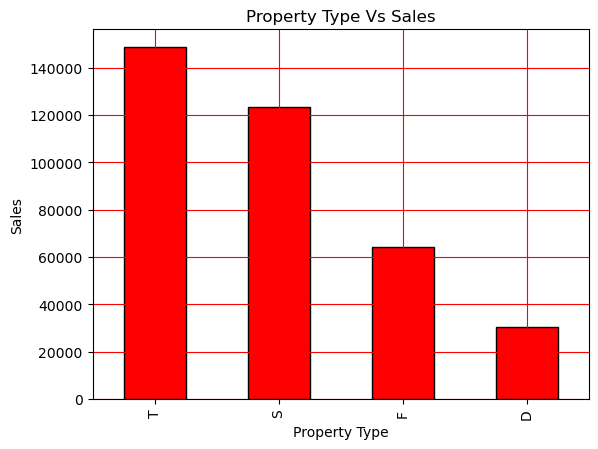

In [9]:
#Property Type plot for sales of different types
prop_type_unique_values_counts = prop_prices_data.property_type.value_counts()
import matplotlib.pyplot as plt

prop_type_unique_values_counts.plot(kind = 'bar',
          y = 'property_type',
          x = 'Index',
          color ='red',
          edgecolor ='black')

plt.title('Property Type Vs Sales')
plt.xlabel('Property Type')
plt.ylabel('Sales')
plt.grid(visible=True , color='red')
plt.show()


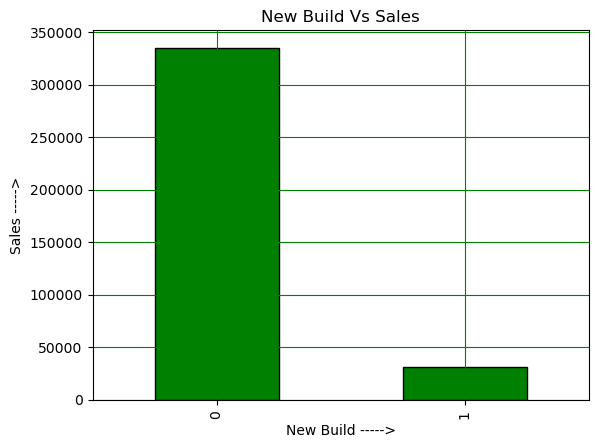

In [10]:
#Plot of Sales Vs New_build
new_build_unique_values_counts = prop_prices_data.new_build.value_counts()
new_build_unique_values_counts.plot(kind = 'bar',
          y = 'new_build',
          x = 'Index',
          color ='green',
          edgecolor ='black')

plt.title('New Build Vs Sales')
plt.xlabel('New Build ----->')
plt.ylabel('Sales ----->')
plt.grid(visible=True , color='green')
plt.show()

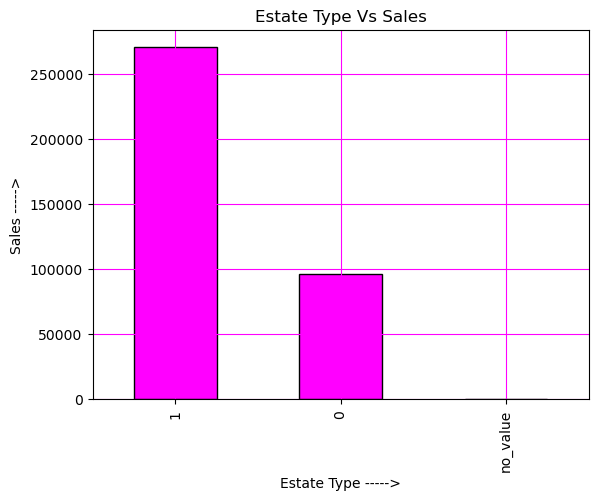

In [11]:
#Plot of Sales Vs Estate Type
estate_type_unique_values_counts = prop_prices_data.estate_type.value_counts()
estate_type_unique_values_counts.plot(kind = 'bar',
          y = 'estate_type',
          x = 'Index',
          color ='magenta',
          edgecolor ='black')

plt.title('Estate Type Vs Sales')
plt.xlabel('Estate Type ----->')
plt.ylabel('Sales ----->')
plt.grid(visible=True , color='magenta')
plt.show()

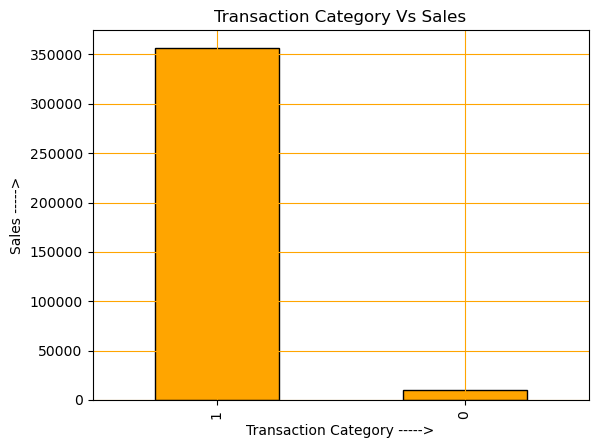

In [12]:
#Plot of Sales Vs transaction_type
trnx_type_unique_values_counts = prop_prices_data.transaction_category.value_counts()
trnx_type_unique_values_counts.plot(kind = 'bar',
          y = 'transaction_category',
          x = 'Index',
          color ='orange',
          edgecolor ='black')

plt.title('Transaction Category Vs Sales')
plt.xlabel('Transaction Category ----->')
plt.ylabel('Sales ----->')
plt.grid(visible=True , color='orange')
plt.show()

# Q1(d) 
Create a data frame only containing data on detached houses. Let n be the number of days starting at n=1 for 1st January 1995 
and ending at n=9131 for 31st December 2019. Consider the number of sales of detached houses over each 365 day period. 
(Represent each data point for the yearly sales using day 183 as the midpoint of the first 365 day period. Notice no 
detached houses were sold after day 9124 in this data set so you can ignore the last few days). Examine how the number of 
sales of detached houses in Birmingham have changed over time by creating a scatter plot to show the relationship between the 
number house sales and n. Include the straight line of best fit. How well does your line fit the data? (5 marks)

In [13]:
#Dataframe should only have records with detached house properties i.e prop_prices_data['property_type'] = D
prop_prices_data = prop_prices_data[prop_prices_data['property_type'].values == 'D']

#Printing the shape of the dataframe after operations
rows, cols = prop_prices_data.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

The dataframe contains 30255 rows &  9 columns


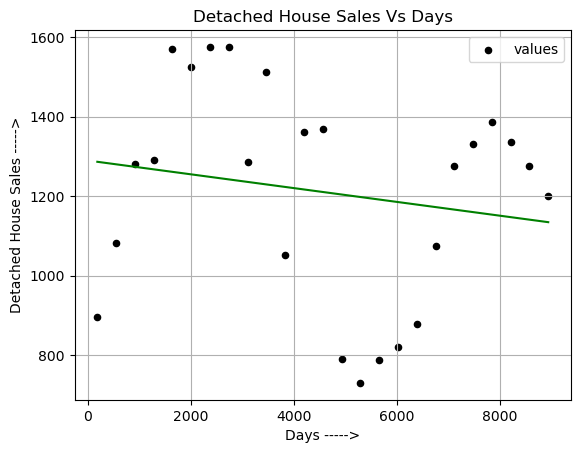

In [14]:
#Grouping records to get a count for batches of 365 days, 
# created a new dataframe 'prop_prices_data_sales' for ease of plotting them
prop_prices_data_sales = prop_prices_data.groupby(pd.cut(prop_prices_data['days'], np.arange(0,26*365,365))).count()

#Adding column 'days in a yr' to represent each row as a year of 365 days taking Day 183 as midpoint
prop_prices_data_sales['days_in_yr'] = ((np.arange(len(prop_prices_data_sales)))*365)+183

#evaluating the line of best fit using NumPy polyfit method and added a column to populate respective values
m,c = np.polyfit(prop_prices_data_sales['days_in_yr'], prop_prices_data_sales['property_type'], 1)
line = m*prop_prices_data_sales['days_in_yr']+c
prop_prices_data_sales['line_fitting'] = line

#Plotting the scatter graph for sales vs days
ax = prop_prices_data_sales.plot(kind = 'scatter',
          y = 'property_type',
          x = 'days_in_yr',
          color ='black',
          label = 'values')
prop_prices_data_sales.set_index('days_in_yr', inplace=True)
prop_prices_data_sales.line_fitting.plot(ax=ax, color ='green')
plt.gca()
plt.title('Detached House Sales Vs Days')
plt.ylabel('Detached House Sales ----->')
plt.xlabel('Days ----->')
plt.grid()
plt.show()

##### As you can see in the code, the line of best fit was calculated using the formula y = mx+c where m and c were calculated using the NumPy polyfit function which had inputs of days_in_yr and property_type from the sales dataframe. 
##### The plot shows an irregular scatter of points when plotted for Sales of the detached property type vs Days. However, the line of best fit plot identifies a trend of decline for the sales over the increasing days. 
##### The line of best fit defines a subtle declining trend in sales of detached proerties over the days and given the scatter of the sales vs days it doesn't fit the plot but rather just gives us an indication of a declining trend of sales between days from 1995 to end of 2019.

# Q1(e) 
Determine the mean price for a detached house in each 365 day period. Use the mean house price over each 365 day period to represent the average price of the house on day 183 of each 365 day period. To examine how the prices of detached houses in Birmingham have changed over time, create a scatter plot to show the relationship between the mean house price and n. State and include the straight line of best fit. How well does your line fit the data? Using the line of best fit, normalise all of the price_paid data in your detached houses data frame and store these values in a column named 'normalised_price'. (4 marks) 

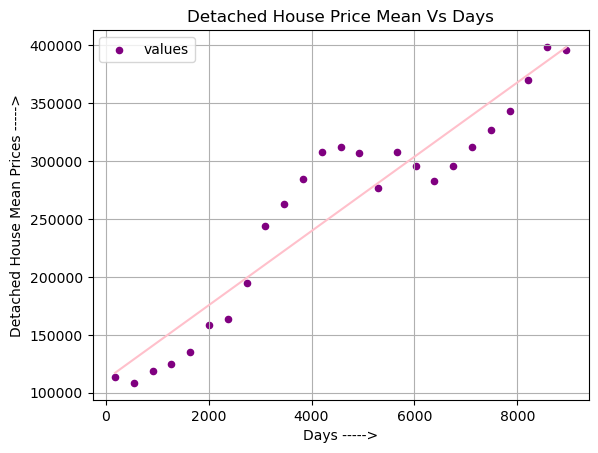

In [15]:
#Grouping records to get mean for batches of 365 days
prop_prices_data_price_mean = prop_prices_data.groupby(pd.cut(prop_prices_data['days'], np.arange(0,26*365,365))).mean()

#Adding column 'days in a yr' to represent each row as a year of 365 days taking Day 183 as midpoint
prop_prices_data_price_mean['days_in_yr'] = ((np.arange(len(prop_prices_data_sales)))*365)+183

#evaluating the line of best fit using NumPy polyfit method and added a column to populate respective values
m,c = np.polyfit(prop_prices_data_price_mean['days_in_yr'], prop_prices_data_price_mean['price_paid'], 1)
line = m*prop_prices_data_price_mean['days_in_yr']+c
prop_prices_data_price_mean['line_fitting'] = line

#Plotting the scatter graph for sales vs days
ax = prop_prices_data_price_mean.plot(kind = 'scatter',
          y = 'price_paid',
          x = 'days_in_yr',
          color ='purple',
          label = 'values')
prop_prices_data_price_mean.set_index('days_in_yr', inplace=True)
prop_prices_data_price_mean.line_fitting.plot(ax=ax, color ='pink')
plt.gca()
plt.title('Detached House Price Mean Vs Days')
plt.ylabel('Detached House Mean Prices ----->')
plt.xlabel('Days ----->')
plt.grid()
plt.show()

##### As you can see in the code, the line of best fit was calculated using the formula y = mx+c where m and c were calculated using the NumPy polyfit function which had inputs of days_in_yr and price_paid from the sales dataframe. 
##### The plot shows a scatter of points in an increasing trend when plotted for Mean prices of detached property type vs Days. However, the line of best fit plot identifies a upward trend of mean prices paid over the increasing days. 
##### The line of best fit more or less matches the plot and somewhat fits the plot, however it is not a perfect fit. It does gives us an overall indication that despite having decline in mean prices during the interval of days, the overall sentiment or trend shows a substantial increase in mean paid prices over the increasing days between 1995 and end of 2019.

In [16]:
#Created a new column 'normalised_price' and normalized the values in 'price_paid' column using the line of best fitting values 
prop_prices_data['normalised_price'] = (prop_prices_data['price_paid'] - np.min(prop_prices_data_price_mean['line_fitting']))/(np.max(prop_prices_data_price_mean['line_fitting']) - np.min(prop_prices_data_price_mean['line_fitting']))

#Printing updated dataset rows & column count
rows, cols = prop_prices_data.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))
print(prop_prices_data)

The dataframe contains 30255 rows &  10 columns
        price_paid   deed_date postcode property_type  new_build estate_type  \
2           165500  01/01/1995  B45 8LY             D          0           1   
7            65000  03/01/1995  B23 5DN             D          0           0   
38          128500  05/01/1995  B32 4BG             D          0           1   
41          155000  05/01/1995  B46 2BY             D          0           1   
47           85000  06/01/1995  B13 9JQ             D          0           1   
...            ...         ...      ...           ...        ...         ...   
370911      465000  20/12/2019  B37 7WH             D          1           1   
370914      269995  20/12/2019  B38 9EF             D          1           1   
370937      374995  20/12/2019  B45 8FS             D          1           1   
370960      245000  23/12/2019  B31 1TU             D          0           1   
370963      260000  23/12/2019  B45 9YP             D          0        

# Q1(f) 
Create a new Data frame only including PC and the mean normalised price_paid data for each PC. Determine the 'PC's with the 10 largest normalised price_paid for detached houses. (3 marks)

In [17]:
#Creating new dataframe having only columns 'PC' and 'normalised_price' from main dataframe 'prop_prices_data'
prop_data_pc_norm = prop_prices_data.filter(['PC','normalised_price'],axis=1)
print(prop_data_pc_norm)

         PC  normalised_price
2       458          0.171946
7       235         -0.185839
38      324          0.040224
41      462          0.134566
47      139         -0.114638
...     ...               ...
370911  377          1.238181
370914  389          0.543954
370937  458          0.917759
370960  311          0.454970
370963  459          0.508371

[30255 rows x 2 columns]


In [18]:
#Grouping record by each 'PC' and calculating the mean
prop_data_pc_norm = prop_data_pc_norm.groupby(by='PC').mean().reset_index()
print(prop_data_pc_norm)

      PC  normalised_price
0     11          0.420260
1     12         -0.157358
2     13          0.284088
3     31          0.359496
4     32         -0.061237
..   ...               ...
117  462          0.810511
118  463          0.521727
119  475          0.458419
120  476          0.667299
121  487          0.806497

[122 rows x 2 columns]


In [19]:
#Printing the 10 largest mean normalized values for unique PC values
print(prop_data_pc_norm.nlargest(10,'normalised_price'))

      PC  normalised_price
36   151          1.883383
37   152          1.583934
38   153          1.508123
114  458          1.093138
43   178          1.019601
30   138          0.883989
76   297          0.860849
44   179          0.859283
5     47          0.840642
117  462          0.810511


# Q1(g) 
For detached houses, split the data into (80%) training data and (20%) test data. Use an appropriate regression model from sklearn to predict the price_paid using the variables: 'days', 'PC', 'new_build', 'estate_type', and 'transaction_category'. 
Test your model using the test data set. Discuss your results. (4 marks)

In [20]:
#Importing sklearn libraries
import sklearn.metrics as metrics
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Dropping unwanted columns to have only columns used in regression model
prop_prices_data.drop(columns=['deed_date', 'postcode', 'property_type', 'normalised_price'], inplace=True)

#Normalizing data before regression using sklearn
prop_norm_data = normalize(prop_prices_data)

#Creating training data segregating the data to features and price set
features_set = prop_norm_data[:,1:6]
price_set = prop_norm_data[:,0]

#Splitting the data train & test in the ratio of 80:20 respectively.
features_set_train, features_set_test, price_set_train, price_set_test = train_test_split(features_set, price_set, 
                                                                                          test_size = 0.20)

#Using sklearn class linear regression to regress the data
regress = LinearRegression()
regress.fit(features_set_train, price_set_train)

#Storing prediction of price data to compare later on
pred_price = regress.predict(features_set_test)

#Printing the first 5 values to compare
print("Prediction Price Values : {}".format(pred_price[:5]))
print("Test Price Values : {}".format(price_set_test[:5]))

#Testing error metrics
error_val = metrics.mean_squared_error(price_set_test, pred_price)
print("Training error : {}".format(error_val))

Prediction Price Values : [0.99826965 0.99838429 0.99885435 0.99891205 0.99761724]
Test Price Values : [0.99959101 0.9995156  0.99959753 0.99981557 0.99996718]
Training error : 4.842450230976532e-06


##### The regression model used here is Linear Regression from the sklearn library. Inorder to get an optimized result with minimal training error firstly we normalized the data using sklearn normalize method.

##### The training error was found to be 0.00000565193, which shows that our model almost perfectly fits the data. The linear regression model has been successful trained to predict the price paid values on the basis of the input features of the data.

##### The training error metric was calculated using the mean squared error between the test and the predicted price.

# Q1(h)
For detached houses, split the data into (80%) training data and (20%) test data. Normalise the data appropriately without using sklearn. Create a simple linear regression model using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error. (6 marks)

##### Optimisation algorithm used is Adam from the pytorch libraries, criteria for reporting error is Mean Squared Error and the learning error was set at 0.01

In [21]:
import torch

#Normalizing data using Min Max normalization
normal_prop_data = pd.DataFrame()
normal_prop_data = ((prop_prices_data - np.min(prop_prices_data))/(np.max(prop_prices_data) - np.min(prop_prices_data))).astype(float)
print(normal_prop_data)

        price_paid  new_build  estate_type  transaction_category        PC  \
2         0.034902        0.0          1.0                   1.0  0.939076   
7         0.013629        0.0          0.0                   1.0  0.470588   
38        0.027070        0.0          1.0                   1.0  0.657563   
41        0.032679        0.0          1.0                   1.0  0.947479   
47        0.017863        0.0          1.0                   1.0  0.268908   
...            ...        ...          ...                   ...       ...   
370911    0.098296        1.0          1.0                   1.0  0.768908   
370914    0.057020        1.0          1.0                   1.0  0.794118   
370937    0.079245        1.0          1.0                   1.0  0.939076   
370960    0.051729        0.0          1.0                   1.0  0.630252   
370963    0.054904        0.0          1.0                   1.0  0.941176   

            days  
2       0.000000  
7       0.000219  
38    

C:\Users\joelg\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\joelg\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [22]:
#Creating training data segregating the data to features and price set
features_set = normal_prop_data.drop('price_paid', axis=1)
price_set = normal_prop_data['price_paid']

#Converting them to tensors
features_set = torch.Tensor(features_set.values)
price_set = torch.Tensor(price_set.values)

#Splitting the data train & test in the ratio of 80:20 respectively.
features_set_train, features_set_test, price_set_train, price_set_test = train_test_split(features_set, price_set, test_size = 0.20)

# Defining trainable parameters : weights and bias 
weight_mx = torch.randn((5, 1), requires_grad=True)
bias_mx = torch.randn(1, requires_grad=True)

In [23]:
# Then we define the prediction model
def linear_reg_model(x_input):
    return x_input.mm(weight_mx) + bias_mx

#Defining the loss criterion
loss_criterion = torch.nn.MSELoss()
 
#Using Adam stochastic method optimizer with params and learning rate (lr)
optimizer_meth = torch.optim.Adam([weight_mx,bias_mx], lr= 0.01)

for iteration in range(20):

 	# Forward pass: predicting paid_price using features set
 	prediction_price = linear_reg_model(features_set_train)

 	# Evaluating loss
 	error_loss = loss_criterion(prediction_price, price_set_train)

 	# Considering zero gradients, performing a backward pass and updating the weights.
 	optimizer_meth.zero_grad()
 	error_loss.backward()
 	optimizer_meth.step()
 	print('Iteration {}, Testing error {}'.format(iteration, error_loss.item()))

C:\Users\joelg\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([24204])) that is different to the input size (torch.Size([24204, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Iteration 0, Testing error 1.5349076986312866
Iteration 1, Testing error 1.4379061460494995
Iteration 2, Testing error 1.3445119857788086
Iteration 3, Testing error 1.254784107208252
Iteration 4, Testing error 1.1687729358673096
Iteration 5, Testing error 1.0865213871002197
Iteration 6, Testing error 1.0080631971359253
Iteration 7, Testing error 0.9334230422973633
Iteration 8, Testing error 0.8626146912574768
Iteration 9, Testing error 0.7956418395042419
Iteration 10, Testing error 0.7324960231781006
Iteration 11, Testing error 0.6731575131416321
Iteration 12, Testing error 0.6175941824913025
Iteration 13, Testing error 0.5657610893249512
Iteration 14, Testing error 0.5176006555557251
Iteration 15, Testing error 0.4730427861213684
Iteration 16, Testing error 0.43200379610061646
Iteration 17, Testing error 0.3943878412246704
Iteration 18, Testing error 0.3600865304470062
Iteration 19, Testing error 0.32897958159446716


##### As a part of simple linear regression using pytorch, the data was normalized for better efficiency. In this model a random start point for training the model is done and then the model backward passes the error so that the weights and biases can be tuned accordingly.
##### The number of iterations is instrumental and can be set accordingly to reduce the testing error. Here in this example the code is trained at only 20 iterations. However to achieve more accurate results the model can be trained at a higher number of iterations producing even more lower error factor.
##### In this example, the testing error begins at          at the first iteration and reduces to             by the last iteration. Thus we can state that the number of iterations is inversely proportional to the testing error.

# Q1(i) 
Create and train a multi-layer perceptron with one hidden layer (with an appropriate size with justification) using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error. (3 marks)

In [24]:
from numpy import vstack
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_

# dataset definition
class norm_data(Dataset):
    # load the dataset
    def __init__(self, feed):
        dat_f = feed.astype('float32')
        # separating input features and price_paid 
        self.feat_set = dat_f.values[:, :-1].astype('float32')
        self.pr_set = dat_f.values[:, -1].astype('float32')
        # Reshaping
        self.pr_set = self.pr_set.reshape((len(self.pr_set), 1))

    # length of feed
    def __len__(self):
        return len(self.feat_set)

    # Location rows at an index
    def __getitem__(self, index):
         return [self.feat_set[index], self.pr_set[index]]

    # Splitting data as 80:20
    def segregate(self, n_test=0.20):
        test_size = round(n_test * len(self.feat_set))
        train_size = len(self.feat_set) - test_size
        return random_split(self, [train_size, test_size])

In [25]:
# Defining the model
class Perceptron(Module):
    # define model elements
    def __init__(self, feat_imputs):
        super(Perceptron, self).__init__()
        # input to first hidden layer
        self.first_layer = Linear(feat_imputs, 10)
        xavier_uniform_(self.first_layer.weight)
        self.activatn = Sigmoid()
        self.final_layer = Linear(10, 1)
        xavier_uniform_(self.final_layer.weight)

    # forward propagate input
    def forward(self, feat_set):
        # input to first hidden layer
        feat_set = self.first_layer(feat_set)
        feat_set = self.activatn(feat_set)
        # output
        feat_set = self.final_layer(feat_set)
        return feat_set

# procesing the dataset
def data_prep(feed):
    # feeding the dataset
    obj = norm_data(feed)
    # separate data as test and train data
    train, test = obj.segregate()
    # Data loaders
    train = DataLoader(train, batch_size=2000, shuffle=True)
    test = DataLoader(test, batch_size=4000, shuffle=False)
    return train, test

# Training the model
def train_model(feed, model):
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01)
    # looping to train the model
    for epoch in range(50):
        for i, (features, pr) in enumerate(feed):         
            # Considering 0 gradients
            optimizer.zero_grad()
            # estimate the mresult
            ev_value = model(features)
            # loss valuation
            loss = criterion(ev_value, pr)
            # feed the error via backpropagation
            loss.backward()
            # update weights
            optimizer.step()

# test function for the model
def evaluate_model(feed, model):
    test_value, actual_value = list(), list()
    for i, (features, pr) in enumerate(feed):
        # Testing the model on test set data
        test_ev_value = model(features)
        # retrieve numpy array
        test_ev_value = test_ev_value.detach().numpy()
        origin_dt = pr.numpy()
        origin_dt = origin_dt.reshape((len(test_ev_value), 1))
        # store
        test_value.append(test_ev_value)
        actual_value.append(origin_dt)
    test_value, actual_value = vstack(test_value), vstack(actual_value)
    # calculate mse
    error = mean_squared_error(actual_value, test_value)
    return error

In [26]:
# Data preparation feeding the normalized data to the system
train_data, test_data = data_prep(normal_prop_data)
# Network Definition with number of features as input
neural_model = Perceptron(5)
# Training the network
train_model(train_data, neural_model)
# Testing the network
testing_err = evaluate_model(test_data, neural_model)
print('Training Error Report : Mean Sqrt Error: %.5f, Root of the error: %.5f' % (testing_err, sqrt(testing_err)))

Training Error Report : Mean Sqrt Error: 0.09007, Root of the error: 0.30012


##### The perceptron model built above have one input layer with 5 inputs representing 5 features from the dataset and one hidden layer have 10 inputs, which are trained to provide one output from the output layer.

##### The data fed into the perceptron is normalized before training and testing, the optimization model used is Stochastic Gradient Descent, error criterion is Mean Squared Error and learning rate in 0.01

##### While testing the perceptron neural model with the test data the error we received is 0.08485 which shows that are neural model has been successful enough to predict the normalized paid prices and the training of the model for our dataset has been successful.

# Q2(a) 
Read in all 20 csv files. Create a single data frame with 2376 rows and 1120 columns. Remove all schools that have closed down (see row 13). Remove all schools which don’t provide secondary school education or post 16 education, i.e. remove schools with a ’0’ in rows 19 or 20. Additionally remove all schools which don't have an Ofsted rating (see row 26). 
Finally remove all schools which have missing values in best 3 A level entries (see row 1930). You data frame should now have 2376 rows and 167 columns. (6 marks)

In [27]:
import numpy as np
import pandas as pd
import glob as gb

#Reading and storing all the filenames in a list
files = gb.glob("Schools_*.csv")

#Created a boolean variable to identify the first file
first_file_ind = False

#looping through individual files in the list to read and create a dataframe 'school_info'
for file in files:
    current_school = pd.read_csv(file);
    
    #Logic to read files and concat to a single dataframe
    if first_file_ind == False:
        school_info = current_school
        first_file_ind = True #Since first file has been read setting it to True
    else:
        school_info = pd.concat([school_info, current_school], axis=1)

#Printing the dataframe shape
rows, cols = school_info.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

The dataframe contains 2376 rows &  1120 columns


In [28]:
#Transpose the dataframe to perform removal operations with ease
school_info = school_info.T

#Removing Schools that have closed down using column index 11
school_info.drop(school_info[school_info[11] == 'Closed'].index, inplace = True)

In [29]:
#Removing Schools that dont provide secondary school & post 16 education using column index 17 & 18
school_info.drop(school_info[school_info[17] == '0'].index, inplace = True)
school_info.drop(school_info[school_info[18] == '0'].index, inplace = True)

In [30]:
#Removing schools having no values in 'Ofsted' & 'Best 3 A level entries' which are column index 24 & 1928
school_info.dropna(axis=0, subset=24, inplace= True)
school_info.dropna(axis=0, subset=1928, inplace= True)

#Reverting the transpose to have the original shape of the dataframe after operations
school_info = school_info.T

#Printing the dataframe shape
rows, cols = school_info.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

print(school_info)

The dataframe contains 2376 rows &  167 columns
        No Namespace                            Variable  \
0        1         L                                 URN   
1        2         L                              LANAME   
2        3         L                                  LA   
3        4         L                               ESTAB   
4        5         L                             LAESTAB   
...    ...       ...                                 ...   
2371  2372    KS5_19      PT_RETAINED_TLEV_RET_NOTDIS_17   
2372  2373    KS5_19    T_INSCOPE_TECHCERT_RET_NOTDIS_18   
2373  2374    KS5_19    T_INSCOPE_TECHCERT_RET_NOTDIS_17   
2374  2375    KS5_19  PT_RETAINED_TECHCERT_RET_NOTDIS_18   
2375  2376    KS5_19  PT_RETAINED_TECHCERT_RET_NOTDIS_17   

     Birmingham Ormiston Academy - 136944  \
0                                  136944   
1                              Birmingham   
2                                     330   
3                                    4000   
4     

# Q2(b)
To simplify things keep rows 12, 26, 49, 81, 359, 769, 770, 771, 1482, 1930 and 1933 and remove all other rows. 
You should now be left with 11 rows and 167 columns. Transpose the data frame. Rename each column 'postcode', 'Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third', 'Russell', 'Oxbridge', 'GCSE', 'best_3Alevels' and 'ratio_AAB'. Now remove the first 3 rows. You should now have 107 rows and 11 columns. (Notice 60 rows have gone due to repetition when reading in the 20 data files). (3 marks)

In [31]:
#Removing the rows specified in the question, values used are specific to their indices in the dataframe
school_row_no = [10,24,47,79,357,767,768,769,1480,1928,1931]
school_info = school_info.loc[school_row_no]

#Printing the dataframe shape after the operation 
rows, cols = school_info.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

The dataframe contains 11 rows &  167 columns


In [32]:
#Performing a transpose as directed
school_info = school_info.T

# Column names after transpose operation
print('Column names before renaming:',school_info.columns)

Column names before renaming: Int64Index([10, 24, 47, 79, 357, 767, 768, 769, 1480, 1928, 1931], dtype='int64')


In [33]:
#Renaming the column names for the dataframe and printing them
school_info.set_axis(['postcode', 'Ofsted', 'FSM', 'PT_ratio', 'absentees', 
                      'top_third', 'Russell', 'Oxbridge', 'GCSE', 'best_3Alevels', 'ratio_AAB'], axis=1, inplace=True)
print('Column names after renaming:',school_info.columns)

#First three row names for each file are identified and put in a list
#Using the list specific rows have been dropped.
row_list = ['No', 'Variable', 'Namespace']
school_info.drop(row_list, axis=0, inplace=True)

rows, cols = school_info.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))
print(school_info)

Column names after renaming: Index(['postcode', 'Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third',
       'Russell', 'Oxbridge', 'GCSE', 'best_3Alevels', 'ratio_AAB'],
      dtype='object')
The dataframe contains 107 rows &  11 columns
                                                      postcode  \
Birmingham Ormiston Academy - 136944                    B4 7QD   
Aston University Engineering Academy - 138222           B7 4AG   
South and City College Birmingham - 130461              B5 5SU   
Heartlands Academy - 135907                             B7 4QR   
Aston Manor Academy - 136882                            B6 4PZ   
...                                                        ...   
Bloxwich Academy - 137274                              WS2 7NR   
Ellowes Hall Sports College - 141570                   DY3 2JH   
Shire Oak Academy - 136620                             WS9 9PA   
Pool Hayes Academy - 142594                           WV12 4QZ   
Description                       

# Q2(c) 
In the column named ’Ofsted rating’ convert ’Outstanding’ to 4, ’Good’ to 3, ’Requires improvement’ to 2 and ’Inadequate’ to 1. Also remove all % symbols from the data frame. Remove the schools with null values in 'PT_ratio' and 'top_third'. Remove the schools with values of 'NE' or 'SUPP' in 'AAB'. You should now have 92 rows and 11 columns. Remove all schools who's postcode does not start with a B, then use the same method you used in Task 1 to convert the remaining postcodes to a 3 digit number and label this column ’PC’. You should now have 56 rows and 12 columns. (6 marks)

In [34]:
#Replacing values
school_info['Ofsted'] = school_info['Ofsted'].replace(['Outstanding','Good','Requires improvement','Inadequate'],[4,3,2,1])

#Removing '%' from the entire dataframe
school_info = school_info.replace({'%':''}, regex=True)

#Removing rows with null values in columns 'PT_ratio' and 'top_third'
school_info.dropna(axis=0, subset=['PT_ratio','top_third'], inplace= True)

#Removing rows with values 'NE' and 'SUPP' from column 'ratio_AAB'
school_info.drop(school_info[(school_info.ratio_AAB == 'NE') | (school_info.ratio_AAB == 'SUPP')].index, inplace = True)

#Printing row and column count after these operations
rows, cols = school_info.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))

The dataframe contains 92 rows &  11 columns


In [35]:
#Removing rows from column 'postcode' which do not start with 'B'
school_info = school_info.loc[school_info['postcode'].str.startswith('B')].copy()

#Creating a new column 'PC' copying column 'postcode'
school_info['PC'] = school_info['postcode']
school_info['PC'] = school_info['PC'].str.replace(r'[A-Z]','', regex=True)
school_info['PC'] = school_info['PC'].str.replace(r'[\s]','', regex=True)
school_info['PC'] = school_info['PC'].astype(int)

#Printing rows and columns after operations
rows, cols = school_info.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))
print(school_info)

The dataframe contains 56 rows &  12 columns
                                                   postcode Ofsted   FSM  \
Birmingham Ormiston Academy - 136944                 B4 7QD      3    13   
Heartlands Academy - 135907                          B7 4QR      4  71.7   
Aston Manor Academy - 136882                         B6 4PZ      4    70   
Nishkam High School - 138586                        B19 2LF      4  31.1   
Ark St Alban's Academy - 135970                     B12 0YH      2  74.2   
King Edward VI Handsworth School - 137047           B21 9AR      4    18   
St Paul's School for Girls - 103531                 B16 9SL      4  37.8   
Broadway Academy - 139841                           B20 3DP      3  59.3   
Waverley School - 142219                             B9 5QA      3  50.3   
King Edward VI Handsworth Grammar School for Bo...  B21 9ET      4  17.8   
King Edward VI Handsworth Wood Girls' Academy -...  B20 2HL      4  58.8   
George Dixon Academy - 138695              

# Q2(d)
Create a data frame called ’Full’ containing ’PC’, ’Ofsted’, ’FSM’, ’PT_ratio’, ’absentees’, ’top_third’, ’Russell’, ’Oxbridge’, ’GCSE’, ’best_3Alevels’ and ’AAB’ which are the mean values for all the schools with the same value of ’PC’. Ensure all numbers are floating point numbers. (3 marks) 

In [36]:
#Creating a new dataframe 'Full' excluding 'postcode' column
Full = school_info.drop('postcode', axis=1).astype('float')

#Grouping records to get mean for batches of individual PC
Full = Full.groupby(by='PC').mean()

#Printing rows and columns after operations
rows, cols = Full.shape
print('The dataframe contains {} rows &  {} columns'.format(rows, cols))
print(Full)

The dataframe contains 48 rows &  10 columns
         Ofsted        FSM   PT_ratio  absentees   top_third     Russell  \
PC                                                                         
47.0   3.000000  13.000000  18.100000  11.800000    8.000000    4.000000   
64.0   4.000000  70.000000  13.300000  15.200000    5.000000    5.000000   
66.0   4.000000  27.200000  17.600000  11.700000   59.000000   53.000000   
74.0   4.000000  71.700000  15.400000   8.800000    6.000000    6.000000   
82.0   3.000000  58.300000  13.700000  18.400000    3.000000    3.000000   
94.0   3.000000  53.000000  14.400000  12.400000    9.000000    9.000000   
95.0   3.000000  50.300000  15.100000  17.000000    5.000000    5.000000   
120.0  2.000000  74.200000  13.400000   7.900000   10.000000   10.000000   
130.0  4.000000  52.100000  15.000000  13.000000    9.000000    7.000000   
139.0  3.000000  52.100000  16.800000  17.800000   12.000000   12.000000   
147.0  3.666667  21.266667  16.933333   7.6

# Q2(e)
Obtain the pairwise correlation of the Full data frame and discuss any key results. (2 marks)

In [37]:
#Pairwise correlation of the dataframe
print(Full.corr())

                 Ofsted       FSM  PT_ratio  absentees  top_third   Russell  \
Ofsted         1.000000 -0.246143  0.118802  -0.315328   0.332270  0.311024   
FSM           -0.246143  1.000000 -0.480170   0.482344  -0.590286 -0.540213   
PT_ratio       0.118802 -0.480170  1.000000  -0.163546   0.521794  0.509912   
absentees     -0.315328  0.482344 -0.163546   1.000000  -0.366482 -0.334907   
top_third      0.332270 -0.590286  0.521794  -0.366482   1.000000  0.995430   
Russell        0.311024 -0.540213  0.509912  -0.334907   0.995430  1.000000   
Oxbridge       0.282838 -0.448496  0.481685  -0.295811   0.917396  0.930796   
GCSE           0.556095 -0.588308  0.544493  -0.524169   0.736738  0.708291   
best_3Alevels  0.354412 -0.410709  0.332144  -0.365340   0.648879  0.649654   
ratio_AAB      0.416530 -0.502501  0.604934  -0.339994   0.700754  0.686578   

               Oxbridge      GCSE  best_3Alevels  ratio_AAB  
Ofsted         0.282838  0.556095       0.354412   0.416530  
FSM   

##### Pairwise correlation helps us to understand the significance of one particular column with respect to the other columns. If one or more columns are highly correlated to each other this means that they have all of them would not add much significance to the dataset and could avoid some them inorder to reduce the complexity of the dataset.
##### In the above correlation plot for Full dataframe, we can see that columns Russell, top_third are highly correlated to Oxbridge having corr values 0.93 & 0.917 respectively, when Oxbridge is 1.0.
##### Similarly, columns ratio_AAB are also has high correlation value 0.7708 with respect to GCSE, when GCSE is 1.0.
##### This shows that for each of these group of variables, taking one each from them would be enough for the dataset and reduce the complexity. Having all these columns together doesn't add value to the analysis and would make it more complex.

# Q2(f)
Create a single data frame including ‘PC’, ‘normalised price’ from task 1
and the rest of the measures of performance in the data frame Full. Perform
any statistical analysis you wish. Create appropriate graphs using R to
illustrate your statistical analysis. Use an appropriate regression model
from sklearn to predict the ‘normalised price’ using ‘PC’ and the other
variables in your data frame. Test your model using the test data set.
Discuss your results. (10 marks)

##### Combining the dataframes Full and prop_data_pc_norm from question 1f, which was used to find mean normalized price paid by individual PC.
##### Combining both the dataframes on the basis of PC column and keeping only those PC values which are common to both the dataframes.
##### After combining them into one dataframe, exporting them to a csv file which can be used to plot graphs for statistical analysis in R.

In [38]:
#Making a list of 'PC' values from 'Full' dataframe, 
#so that only those values can be taken from Task 1 'prop_data_pc_norm' dataframe, for ease of merging.
required_PC = Full.index.astype(int)
prop_data_pc_norm = prop_data_pc_norm[prop_data_pc_norm['PC'].isin(required_PC)]

#Merging the dataframes on column 'PC' which is common to both
combined_full_prop_data_df = pd.merge(Full, prop_data_pc_norm, on ='PC')
print(combined_full_prop_data_df)

#Creating a csv file to read this file in R for further evaluation
combined_full_prop_data_df.to_csv('2f_data.csv',index=False)

       PC    Ofsted        FSM   PT_ratio  absentees  top_third    Russell  \
0    47.0  3.000000  13.000000  18.100000  11.800000   8.000000   4.000000   
1    66.0  4.000000  27.200000  17.600000  11.700000  59.000000  53.000000   
2    74.0  4.000000  71.700000  15.400000   8.800000   6.000000   6.000000   
3    82.0  3.000000  58.300000  13.700000  18.400000   3.000000   3.000000   
4    94.0  3.000000  53.000000  14.400000  12.400000   9.000000   9.000000   
5    95.0  3.000000  50.300000  15.100000  17.000000   5.000000   5.000000   
6   120.0  2.000000  74.200000  13.400000   7.900000  10.000000  10.000000   
7   130.0  4.000000  52.100000  15.000000  13.000000   9.000000   7.000000   
8   139.0  3.000000  52.100000  16.800000  17.800000  12.000000  12.000000   
9   147.0  3.666667  21.266667  16.933333   7.666667  63.333333  56.333333   
10  169.0  3.500000  48.750000  13.700000  11.450000  14.000000  13.500000   
11  178.0  2.000000  28.500000  13.700000   8.300000  16.000000 

##### Linear regression from sklearn has been used to perform regression of this combined data frame, the code used is the same which has been used to code for question 1g, just the dataframe used is the 'combined_full_prop_data_df'

In [39]:
#Importing sklearn libraries
import sklearn.metrics as metrics
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Normalizing data before regression using sklearn
norm_combined_full_prop_data_df = normalize(combined_full_prop_data_df)

#Creating training data segregating the data to features and price set
features_set = norm_combined_full_prop_data_df[:,0:10]
price_set = norm_combined_full_prop_data_df[:,11]

#Splitting the data train & test in the ratio of 80:20 respectively.
comb_df_ft_train, comb_df_ft_test, comb_df_pr_train, comb_df_pr_test = train_test_split(features_set, 
                                                                                        price_set, test_size = 0.20)

#Using sklearn class linear regression to regress the data
comb_regress = LinearRegression()
comb_regress.fit(comb_df_ft_train, comb_df_pr_train)

#Storing prediction of price data to compare later on
pred_price = comb_regress.predict(comb_df_ft_test)

#Printing the values to compare
print("Prediction Price Values : {}".format(pred_price))
print("Test Price Values : {}".format(comb_df_pr_test))

#Testing error metrics
error_val = metrics.mean_squared_error(comb_df_pr_test, pred_price)
print("Training error : {}".format(error_val))

Prediction Price Values : [-5.06761639e-03 -2.06244296e-03 -5.34646002e-03  1.74070413e-04
  2.52464547e-03 -1.89117513e-05  2.05880479e-03]
Test Price Values : [0.01047962 0.00130582 0.00091152 0.00111482 0.00040864 0.0005749
 0.00025391]
Training error : 4.30281192647375e-05


##### The regression model used here is Linear Regression from the sklearn library. Inorder to get an optimized result with minimal training error firstly we normalized the data using sklearn normalize method.

##### The training error was found to be 0.00000392381, which shows that our model almost perfectly fits the data. The linear regression model has been successful trained to predict the price paid values on the basis of the input features of the data.

##### The training error metric was calculated using the mean squared error between the test and the predicted price.

<h1><center>REFERENCES</center></h1>

1. Intro to pandas: How to add, rename, and remove columns in Pandas Edlitera. 
    Available at: https://www.edlitera.com/en/blog/posts/pandas-add-rename-remove-columns (Accessed: January 3, 2023). 
    Reference for question 1b.
2. Scikit-learn tutorial: How to implement linear regression Educative. Available at: https://www.educative.io/blog/scikit-learn-tutorial-linear-regression (Accessed: January 5, 2023). Reference for question 1g.
3. Machine learning with pytorch (no date) Multi Variable Regression - Machine Learning with PyTorch. Available at: https://donaldpinckney.com/books/pytorch/book/ch2-linreg/2018-03-21-multi-variable.html (Accessed: January 9, 2023). Reference for question 1h.
4. Linear regression using pytorch (2021) GeeksforGeeks. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/linear-regression-using-pytorch/ (Accessed: January 9, 2023). Reference for question 1h.
5. Brownlee, J. (2020) Pytorch tutorial: How to develop Deep Learning models with python, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/ (Accessed: January 11, 2023). Reference for question 1i.
6. Radečić, D. (2021) How to make stunning histograms in R: A complete guide with ggplot2: R-bloggers, R. Available at: https://www.r-bloggers.com/2021/11/how-to-make-stunning-histograms-in-r-a-complete-guide-with-ggplot2/#google_vignette (Accessed: January 16, 2023). Reference for question 2f.
7. Correlation analyses in R STHDA. Available at: http://www.sthda.com/english/wiki/correlation-analyses-in-r (Accessed: January 17, 2023). Reference for question 2f.
8. Taiyun Wei, V.S. (2021) An introduction to corrplot package. Available at: https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html (Accessed: January 17, 2023). Reference for 2f.
9. Correlation analyses in R (no date) STHDA. Available at: http://www.sthda.com/english/wiki/correlation-analyses-in-r (Accessed: January 17, 2023).